<a href="https://colab.research.google.com/github/reaganman/Modeling-infectious-disease/blob/main/Modeling_infectious_disease_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define functions for SIR model using forward Euler solver

In [2]:
# Basic SIR solver
def SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0

    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]

            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize

    return S, I, R, T

# SIR solver with birth and death, where death rate is 1/2 uBirth. Default uBirth is 0.01
def SIR_birth_and_death(S0, I0, R0, beta, gamma, t_max, stepsize, uBirth=0.01):
    T = np.arange(0, t_max+stepsize, stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = np.zeros(len(T))
    uDeath = 0.5 * uBirth           # Set death rate to 1/2 birth rate -> pop is growing

    for idx, t in enumerate(T):
        if idx == 0:                # Set inital conditions
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N[idx] = S0 + I0 + R0
        else:                       # Use previous solution to solve for current solution
            dS_dt = (-beta * S[idx-1] * I[idx-1] / N[idx-1]) + (uBirth * N[idx-1]) - (uDeath * S[idx-1])
            dI_dt = ( beta * S[idx-1] * I[idx-1] / N[idx-1]) - (gamma *  I[idx-1]) - (uDeath * I[idx-1])
            dR_dt = (gamma * I[idx-1]                      )                       - (uDeath * R[idx-1])
                                    # Update solution
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
            N[idx] = S[idx] + I[idx] + R[idx]

    print(f"N at T = {t_max}: {round(N[len(T)-1])}")
    return(S, I, R, T)


Run SIR simulations and plot

N at T = 100: 1649


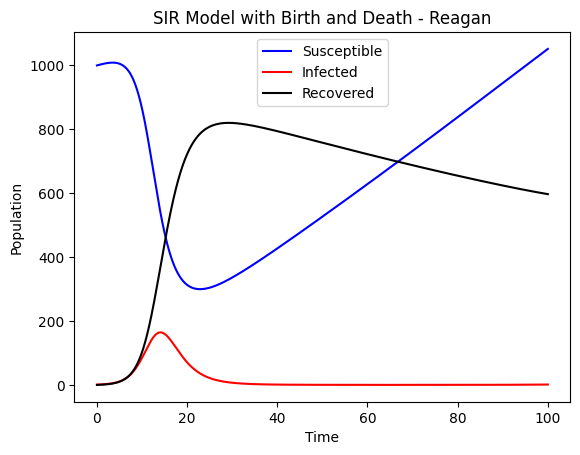

In [3]:
# SIMUlate SIR with birth and death
S0, I0, R0, beta, gamma = 999, 1, 0, 1, 0.5
S, I, R, T = SIR_birth_and_death(S0, I0, R0, beta, gamma, 100, 0.1, uBirth=0.01)


# PLot
fig, ax = plt.subplots()
ax.plot(T, S, color='b', label='Susceptible')
ax.plot(T, I, color='red', label='Infected')
ax.plot(T, R, color='k', label='Recovered')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('SIR Model with Birth and Death - Reagan')
ax.legend()
plt.savefig('SIR_birth_and_death.png')
plt.show()


Determine final epidemic size

/tmp/ipython-input-1659733503.py:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  r_infty_solution = fsolve(func, 0.5)[0]


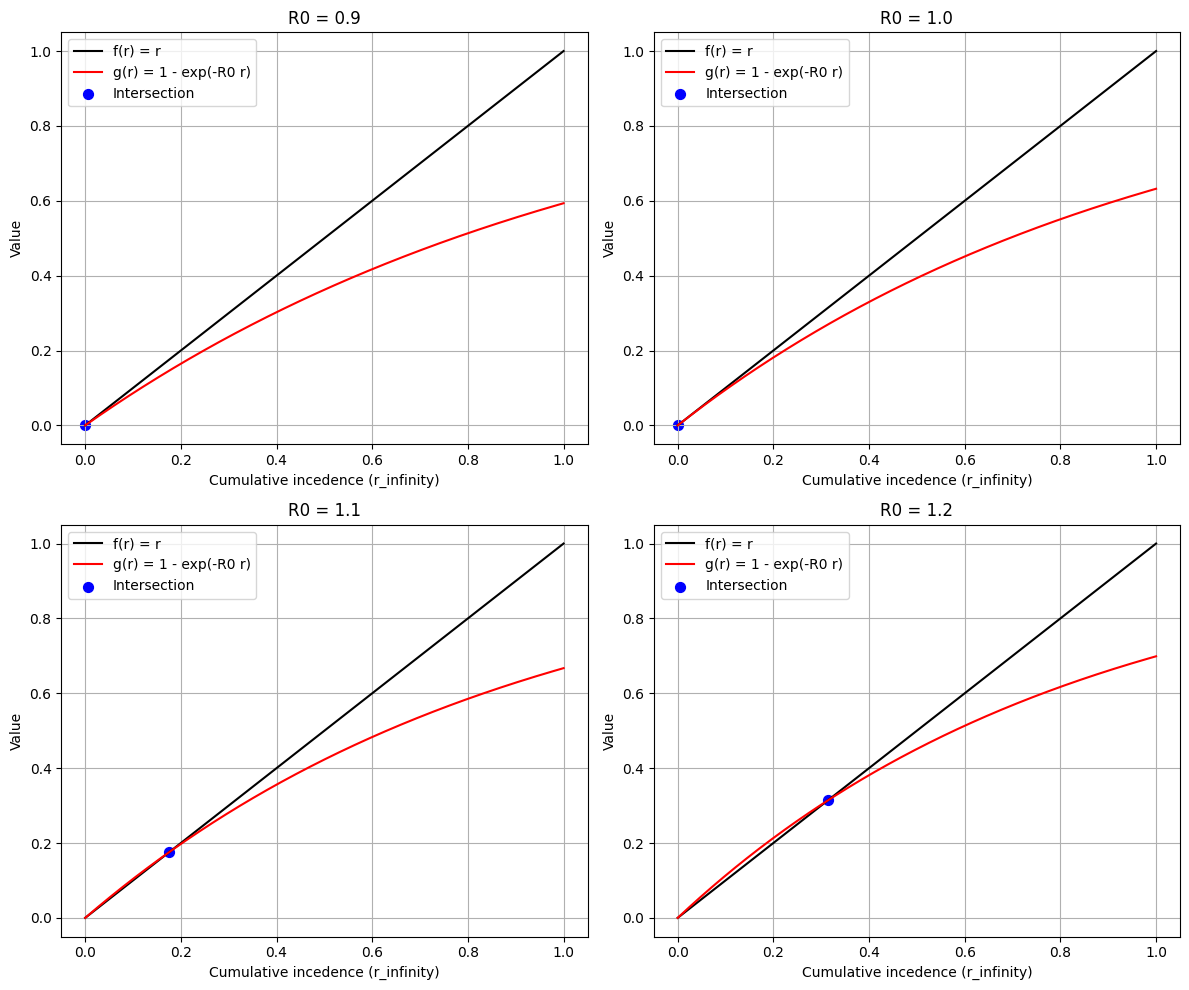

In [4]:
from typing_extensions import final
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Solve the final size equation r_infty = 1 - exp(-R0 * r_infty) for a given R0.
def final_size(R0):
    # Define the function whose root we want
    func = lambda r: r - (1 - np.exp(-R0 * r))

    # Solve using fsolve with initial guess 0.5
    r_infty_solution = fsolve(func, 0.5)[0]

    return r_infty_solution

R0_values = [0.9, 1.0, 1.1, 1.2]

r = np.linspace(0, 1, 500)

plt.figure(figsize=(12, 10))

for i, R0 in enumerate(R0_values, 1):
    f = r
    g = 1 - np.exp(-R0 * r)

    # Solve intersection
    r_infinity_solution = final_size(R0)

    plt.subplot(2, 2, i)
    plt.plot(r, f, 'k', label='f(r) = r')
    plt.plot(r, g, 'r', label='g(r) = 1 - exp(-R0 r)')
    plt.scatter(r_infinity_solution, r_infinity_solution, color='blue', s=50, label='Intersection')
    plt.title(f'R0 = {R0}')
    plt.xlabel('Cumulative incedence (r_infinity)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig('final_size.png')
plt.show()

Test cumulative incedence predicitons with SIR model w/ birth and death

Cumulative incedence: 798.405754280041


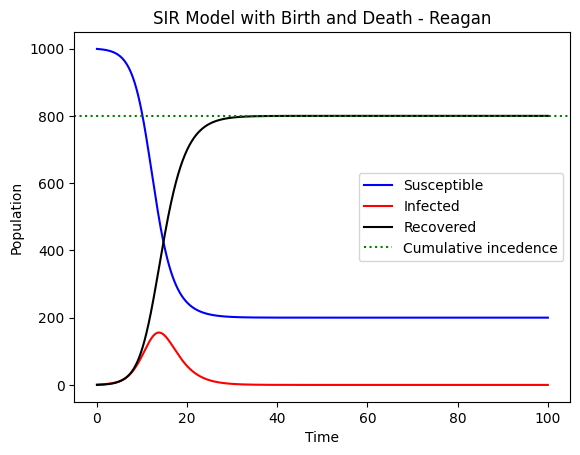

In [5]:
# SIMUlate SIR with birth and death
S0, I0, R0, beta, gamma = 999, 1, 0, 1, 0.5
S, I, R, T = SIR(S0, I0, R0, beta, gamma, 100, 0.1)
Rn = 1/gamma
cum_incedence = final_size(Rn) * (S0+I0+Rn)
print(f"Cumulative incedence: {cum_incedence}")


# PLot
fig, ax = plt.subplots()
ax.plot(T, S, color='b', label='Susceptible')
ax.plot(T, I, color='red', label='Infected')
ax.plot(T, R, color='k', label='Recovered')
plt.axhline(y=cum_incedence, color='green', linestyle=':', label='Cumulative incedence')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.set_title('SIR Model with Birth and Death - Reagan')
ax.legend()
plt.savefig('SIR_birth_and_death.png')
plt.show()

With N=10<sup>6</sup>,      $\epsilon$=1/N show that DFE for SIR model is only stable when S < 1/R0 and unstable otherwise

running SIR with Rn = 0.8
running SIR with Rn = 0.9
running SIR with Rn = 1.0
running SIR with Rn = 1.1
running SIR with Rn = 1.2


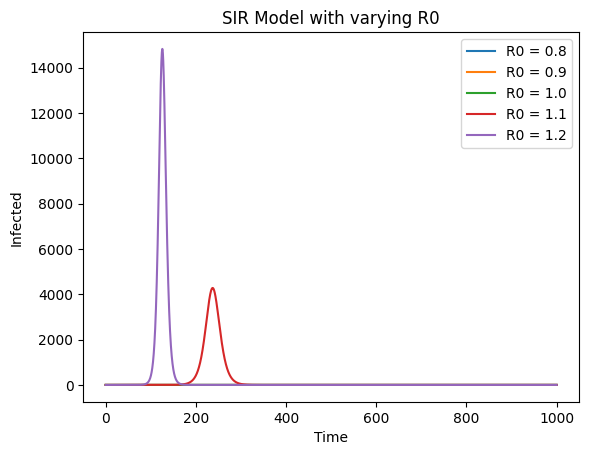

In [6]:
N = 10**6
e = 1/N
I0 = e
R0 = 0
S0 = N - I0 - R0


betas = [0.8,  0.9, 1, 1.1, 1.2]
gammas = [1]

SIR_runs = {}

for beta in betas:
    for gamma in gammas:
        Rn = beta/gamma
        if Rn not in SIR_runs:
          print(f"running SIR with Rn = {Rn}")
          S, I, R, T = SIR(S0, I0, R0, beta, gamma, 1000, 0.1)
          SIR_runs[Rn] = (S, I, R, T)
# Plot
# for run in SIR_runs:
#     S, I, R, T = SIR_runs[run]
#     fig, ax = plt.subplots()
#     ax.plot(T, S, color='b', label='Susceptible')
#     ax.plot(T, I, color='red', label='Infected')
#     ax.plot(T, R, color='k', label='Recovered')
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Population')
#     ax.set_title(f'SIR Model with R0 = {run} 1/R0 = {1/run}')
#     ax.legend()

# plot only I for different Rn
Rn_I = {}
for run in SIR_runs:
    S, I, R, T = SIR_runs[run]
    Rn_I[run] = I
fig, ax = plt.subplots()
for run in Rn_I:
    ax.plot(T, Rn_I[run], label=f'R0 = {run}')
ax.set_xlabel('Time')
ax.set_ylabel('Infected')
ax.set_title('SIR Model with varying R0')
ax.legend()
plt.savefig('SIR_varying_R0.png')
plt.show()

